<a href="https://colab.research.google.com/github/bngrossmann/food-sales-predictions/blob/main/food_sales_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Prediction
-Benjamin N. Grossmann

This project is currently a work in progress.

---
# → Loading and Examining the Data
___


In [1]:
import numpy as np
import pandas as pd

filename = "/content/drive/MyDrive/Coding Dojo/Data Folder/sales_predictions.csv"
df_sales = pd.read_csv(filename)
display(df_sales.head())
df_sales.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 8523 rows of data across 12 columns.

A comparison of the datatypes for each column to the expected information type (infered from the information displayed in the `.head()` above) appears to be consistent.

* alphanumeric codes → `object`
    * Item_Identifier, Outlet_Identifier
* qualitative categories → `object`
    * Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location, Outlet_Type
* quantitative measurement → `float64`
    * Item_Weight, Item_Visibiltiy, Item_MRP, Item_Outlet_Sales
* year → `int64`
    * Outlet_Establishment_Year


 (I will note that we are not given the units of measure for any of the numeric quantities.)

---
Because there are Item_Identifier and Outlet_Identifier values, I am inferring these should be unique for each item and each outlet.

In [2]:
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

There are 1559 unique Item_Identifier values and 10 unique Outlet_Identifier values. Since each item can potentially be sold at each outlet, there will be at most 15,590 unique item-outlet pairs. Since there are only 8523 rows of data, there is no obvious red flag of duplicated data rows.

However, there could still be duplicated data rows present. Because each row should be unique, an attempt to drop any duplicates should still be made. 

In [3]:
df_sales.drop_duplicates(keep=False, inplace=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


---
# → Checking Category Names for Consistency

---

There may also be a problem with inconsistent category names. Checking each of the qualitative categories can be done with a `.unique()` or `.value_counts()` method. I find the alignment of the  `.value_counts()` method to be easier to read quickly. I can also the series with `.sort_index()` to get the series in capitalization-alphabetical order. This will make it easier to spot similar entries.

First, the `Item_Fat_Content` column values.

In [4]:
df_sales["Item_Fat_Content"].value_counts().sort_index()

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

There are inconsistant naming conventions used in the `Item_Fat_Content` column. They can be corrected with a `.replace()` method and quickly checked. I will use the initial-capital format which consistant with the column names.

In [5]:
df_sales.replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}, inplace=True)
df_sales["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Next, the `Item_Type` column values.

In [6]:
df_sales["Item_Type"].value_counts().sort_index()

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

These appear to be fine.

Finally, the `Outlet_Type` column values.

In [7]:
df_sales["Outlet_Type"].value_counts().sort_index()

Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

These also appear fine.

After cleaning up the category names, I will drop any rows that might be duplicates.

In [8]:
df_sales.drop_duplicates(keep=False, inplace=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


The number of rows (8523) has not changed, so no rows has been identified as a duplicate at this time.

---
# → Filling in Missing Data

---

There are some columns in the dataframe that are missing values; the Item_Weight and Outlet_Size counts are less then 8523. How many are actually missing can be quickly calculated.

In [9]:
for column in df_sales:
    if df_sales.shape[0] - df_sales[column].count() > 0:
        print(df_sales.shape[0] - df_sales[column].count() , "values are missing from '"+ column +"'" )

1463 values are missing from 'Item_Weight'
2410 values are missing from 'Outlet_Size'


Because there are only two columns with missing data, there are only three kinds of rows with missing data
* Missing only `Item_Weight`
* Missing only `Outlet_Size`
* Missing both `Item_Weight` and `Outlet_Size`


## →→ Item Weight


To address the missing `Item_Weight` values, the corresponding `Item_Identifier` values should be examined. Items with the same `Item_Identifier` should be produced with uniform physical characteristics. The `Item_Weights` is a physical characteristic, so will be constant for a given `Item_Identifier`.

I can determine the mean value of the weight of a given item and replace its missing weights with that mean. If all the known weights of an item are the same, then the mean will also be that value.

If an item has no weights in the data set, then if will not recieve any weight value replacements.

In [10]:
# This was the previous way I did this. However it assumes all items have at least 1 row with a weight value and all the weights are the same for a given item.
# However, if an item does not have a weight in any of its row, it will recieve the wrong value.
# df_sales.sort_values(["Item_Identifier","Item_Weight"]).loc[:,"Item_Identifier":"Item_Weight"].fillna(method='ffill').drop_duplicates()

# New method: scan through the item identifiers then assign the mean value of the item's weight to the values in its missing rows.
# This will not assign weights to items that have no weight prestent.
# The mean value accomadates the possiblity that the item weight may vary.
# Changed on 3/12/2022

for item_code in df_sales.loc[:,"Item_Identifier"].drop_duplicates().sort_values():
    filter_item = ( df_sales["Item_Identifier"] == item_code )
    mean_item_weight = round(df_sales.loc[ filter_item, "Item_Weight"].mean(),3)
    df_sales.update( df_sales.loc[ filter_item , "Item_Weight"].fillna(value = mean_item_weight, inplace=False),overwrite=False)

# Let's inspect the info()
display(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


None

There are still some items with no weight values!

In [11]:
df_sales.loc[ pd.isna(df_sales["Item_Weight"]) , ["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
927,FDN52,NaN
1922,FDK57,NaN
4187,FDE52,NaN
5022,FDQ60,NaN


With no other clues to determine what these 4 values should be. I will ignore them for now because they comprise less than 0.05 % of the data (4 / 8523 * 100 = 0.000469).

Since there are 4 items with no weight value, we should expect 1555 items that do have a weight value (1559 - 4 = 1555).

In [12]:
df_sales.loc[ ~ pd.isna(df_sales["Item_Weight"]) ,"Item_Identifier"].nunique()

1555

## →→ Outlet Size

The process can be repeated for the Outlet_Identifier and Outlet_Size columns, following the same line of reasoning about uniqueness. (The Outlet_Establishment_Year can be left in this dataframe subset because it should be a constant for any given Outlet_Identifier. If it is not, then there is probably something further wrong with the data.)

In [13]:
df_sales.loc[:,"Outlet_Identifier":"Outlet_Type"].drop_duplicates().sort_values(["Outlet_Size"])

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,OUT013,1987,High,Tier 3,Supermarket Type1
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,OUT027,1985,Medium,Tier 3,Supermarket Type3
11,OUT046,1997,Small,Tier 1,Supermarket Type1
19,OUT035,2004,Small,Tier 2,Supermarket Type1
23,OUT019,1985,Small,Tier 1,Grocery Store
3,OUT010,1998,NaN,Tier 3,Grocery Store
8,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,OUT017,2007,NaN,Tier 2,Supermarket Type1


There are 3 outlets with a missing Outlet_Size.

There is no clear relationship between Outlet_Size and any of the other properties. Any analysis that depends upon the size of the outlet must exclude these three outlets without a reasonable estimate of the size.

It is tempting to assume they are medium sized as an average over the size range. However, that implicitly assumes any affects size has is monotonic or porportional across the size range and errors might "average out" between being wrong about not being small or high outlet sizes. The problem is that medium size might really have an extremum effect (the most or the least effect). This could greatly skew the analysis if medium is the wrong choice.

But fortunately, we can create some new information to help. All the outlets sell items. And presumably larger outlets are capable of selling a wider variety of items. So I will determine how many different items each outlet sells.

In [14]:
df_sales["Outlet_Total_Items"] = np.nan
df_sales["Outlet_Total_Sales"] = np.nan

for outlet_code in df_sales.loc[:,"Outlet_Identifier"].drop_duplicates().sort_values():
    filter_outlet = ( df_sales["Outlet_Identifier"] == outlet_code )
    total_items = df_sales.loc[ filter_outlet, "Outlet_Identifier"].count()
    total_sales = df_sales.loc[ filter_outlet, "Item_Outlet_Sales"].sum()
    df_sales.update( df_sales.loc[ filter_outlet , "Outlet_Total_Items"].fillna(value = total_items, inplace=False), overwrite=False)
    df_sales.update( df_sales.loc[ filter_outlet , "Outlet_Total_Sales"].fillna(value = total_sales, inplace=False), overwrite=False)

df_sales = df_sales.convert_dtypes() # The Outle_Total_Items wants to be a float when calculated. I'm forcing it to be an integer because it is a counting number.
df_sales.loc[:,"Outlet_Identifier":"Outlet_Total_Sales"]

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Total_Items,Outlet_Total_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,930,2183969.8102
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,928,1851822.83
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,930,2183969.8102
3,OUT010,1998,<NA>,Tier 3,Grocery Store,732.38,555,188340.1724
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,932,2142663.5782
...,...,...,...,...,...,...,...,...
8518,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,932,2142663.5782
8519,OUT045,2002,<NA>,Tier 2,Supermarket Type1,549.285,929,2036725.477
8520,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,930,2268122.9354
8521,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,928,1851822.83


Looking at the unique information for each outlet..

In [16]:
df_sales.loc[:,["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Total_Items","Outlet_Total_Sales"]].drop_duplicates().sort_values(["Outlet_Total_Sales"])

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Items,Outlet_Total_Sales
23,OUT019,1985,Small,Tier 1,Grocery Store,528,179694.0936
3,OUT010,1998,<NA>,Tier 3,Grocery Store,555,188340.1724
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,928,1851822.83
8,OUT045,2002,<NA>,Tier 2,Supermarket Type1,929,2036725.477
11,OUT046,1997,Small,Tier 1,Supermarket Type1,930,2118395.1682
4,OUT013,1987,High,Tier 3,Supermarket Type1,932,2142663.5782
9,OUT017,2007,<NA>,Tier 2,Supermarket Type1,926,2167465.294
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,930,2183969.8102
19,OUT035,2004,Small,Tier 2,Supermarket Type1,930,2268122.9354
7,OUT027,1985,Medium,Tier 3,Supermarket Type3,935,3453926.0514


There are similarities between `OUT019` and `OUT010`.
* both are grocery stores (no other outlets are)
* sell a similar number of items (just over half of each of the other outlets)
* have similar sales (close to 180,000. only 1 other outlet is close. all others are approximately 10% greater or more.)

It seems reasonable to say that `OUT010` is a small size.

In [18]:
df_sales.update(df_sales.loc[ df_sales["Outlet_Identifier"]=="OUT010" , "Outlet_Size" ].fillna(value ="Small"))

Now that the small outlets have been delt with, I'll look at the remaining outlets.

In [20]:
df_sales.loc[ df_sales["Outlet_Size"]!="Small", ["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Total_Items","Outlet_Total_Sales"] ].drop_duplicates().sort_values(["Outlet_Total_Sales","Outlet_Location_Type"])

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Items,Outlet_Total_Sales
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,928,1851822.83
8,OUT045,2002,<NA>,Tier 2,Supermarket Type1,929,2036725.477
4,OUT013,1987,High,Tier 3,Supermarket Type1,932,2142663.5782
9,OUT017,2007,<NA>,Tier 2,Supermarket Type1,926,2167465.294
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,930,2183969.8102
7,OUT027,1985,Medium,Tier 3,Supermarket Type3,935,3453926.0514


The total number of items sold doesn't reveal any distinction among the outlets as they are all near 930. 

The total sales also does reveal any distinction as the extremes are both medium sized outlets and the high sized outlet is near the middle of the sales figures.

The outlet type also doesn't help, as the 3 medium sized outlets are all different supermarket types.

The outlet type location doesn't help, as medium sized outlets span all three tiers.

Only 3 of the 4 supermarkets (regardless of type number) are medium. Only 1 is high sized.

Additionally, a high sized outlet has a greater cost for land aquisition, construction, and operation. Since the high sized outlet was established in 1987, and the unknown sized outlets were esatblished over a decade later, there was plenty of time for someone to analyse sales figures. Since the high sized outlet performed similarly to the medium sized outlets, there would not be a compelling reason to invest in a larger outlet.

From this I would say the unknown sizes are likely to be medium.

In [22]:
df_sales.update(df_sales.loc[ : , "Outlet_Size" ].fillna(value ="Medium"))
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   string 
 1   Item_Weight                8519 non-null   Float64
 2   Item_Fat_Content           8523 non-null   string 
 3   Item_Visibility            8523 non-null   Float64
 4   Item_Type                  8523 non-null   string 
 5   Item_MRP                   8523 non-null   Float64
 6   Outlet_Identifier          8523 non-null   string 
 7   Outlet_Establishment_Year  8523 non-null   Int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   string 
 10  Outlet_Type                8523 non-null   string 
 11  Item_Outlet_Sales          8523 non-null   Float64
 12  Outlet_Total_Items         8523 non-null   Int64  
 13  Outlet_Total_Sales         8523 non-null   Float

Other than the 4 items of unknow weight, all the data has been filled.

# → Summary Statistics

The summary statistics can be shown for the numerical value columns.

In [49]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Total_Items,Outlet_Total_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8.523000e+03
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914,880.682741,2.012675e+06
std,4.646098,0.051598,62.275067,8.371760,1706.499616,129.397886,8.195691e+05
min,4.555000,0.000000,31.290000,1985.000000,33.290000,528.000000,1.796941e+05
25%,8.785000,0.026989,93.826500,1987.000000,834.247400,928.000000,2.036725e+06
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000,930.000000,2.142664e+06
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,930.000000,2.183970e+06
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,935.000000,3.453926e+06


Note that finding statistics on the Outlet_Establishment_Year may seems odd. However, it might be important how an outlet's age might affect sales. However, the count statistic for the year doesn't have any clear meaning an is purely an artifact of the calender system. The other year statistics can be use to find the corresponding age statistics.

---
#  → Visualization

---

## →→

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

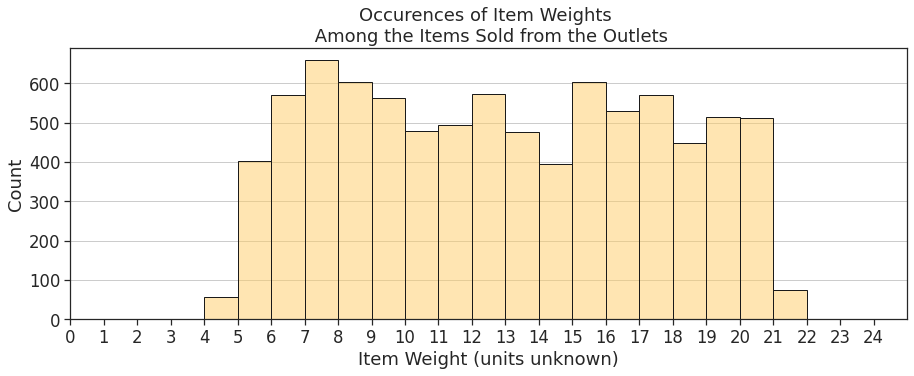

In [55]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 25, 1));
plt.xlim(0,25);
sns.set(font_scale=1.5,style="white")
item_weight_ax = sns.histplot(data=df_sales,x="Item_Weight",binwidth=1,binrange=(0,25),element="bars",color="#fc6", edgecolor="k",alpha=0.5)
item_weight_ax.set(title = "Occurences of Item Weights \n Among the Items Sold from the Outlets" ,xlabel ='Item Weight (units unknown)');
item_weight_ax.yaxis.grid(True);
item_weight_ax.tick_params(bottom=True, left=True)

From the graph histogram for occurences of item weight, it appears that the weights are distributed almost uniformly across their range. If we plot the same data in a box plot, we should be able to reach the same conclusion.

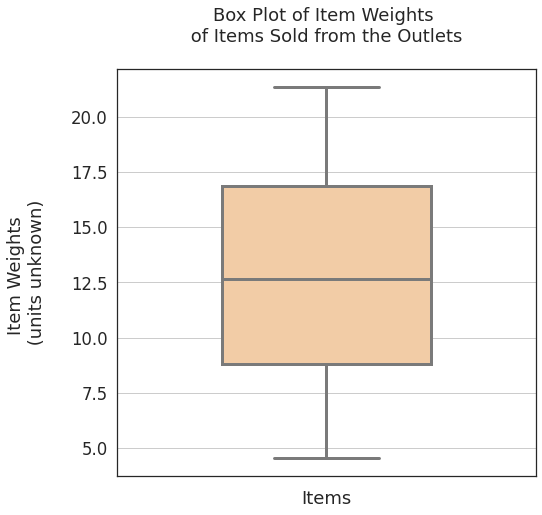

In [59]:
plt.figure(figsize=(7.5,7.5))
sns.set(font_scale=1.5,style="white")
cute_colors= ["#fc9","#9cf"]
box_ax = sns.boxplot(data=df_sales, y="Item_Weight",orient="v",palette=cute_colors,linewidth=3,width=0.5);
box_ax.yaxis.grid(True);
#
box_ax.set(title='Box Plot of Item Weights \n of Items Sold from the Outlets \n',xlabel="Items",ylabel="Item Weights \n (units unknown) \n");

And it does appear each quartile of the item weight data is approximately equal and there are no outliers. So yes, item weights are approximately uniformly distributed across their range.

Looking at other properties such as item visibility gives a very different picture.

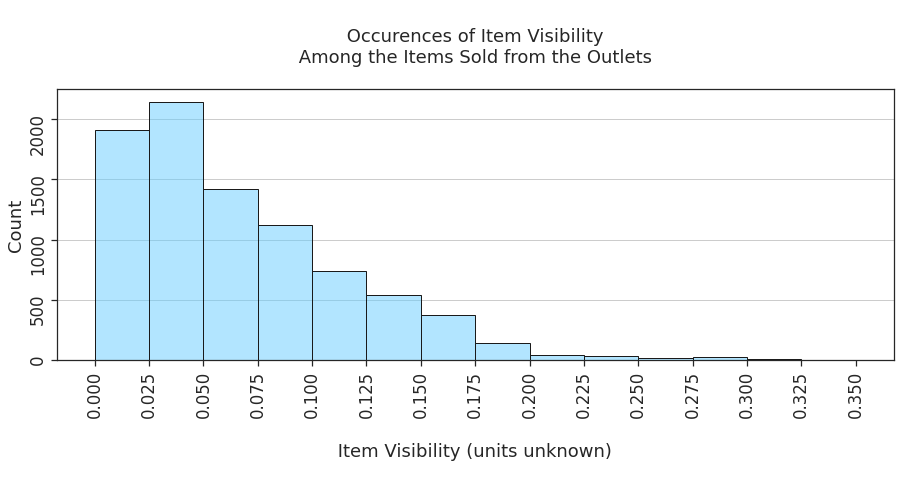

In [56]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 0.375, 0.025));
#plt.xlim(0,25);
sns.set(font_scale=1.5,style="white")
item_weight_ax = sns.histplot(data=df_sales,x="Item_Visibility",binwidth=0.025,binrange=(0,0.35),element="bars",color="#6cf", edgecolor="k",alpha=0.5)
item_weight_ax.set(title = "\n Occurences of Item Visibility \n Among the Items Sold from the Outlets \n" ,xlabel ='\n Item Visibility (units unknown) \n');
item_weight_ax.yaxis.grid(True);
item_weight_ax.tick_params(bottom=True, left=True,rotation=90)

Here we can see that most items have a low visibility value and the number of items with a given visibilty drops as the visibility rises (there is an negative correlation). However, the relationship is not linear, but might be a negative power relationship or have a poisson distribution. Further anaylsis will be required.

An interesting relationship is the sales of each item at each outlet.

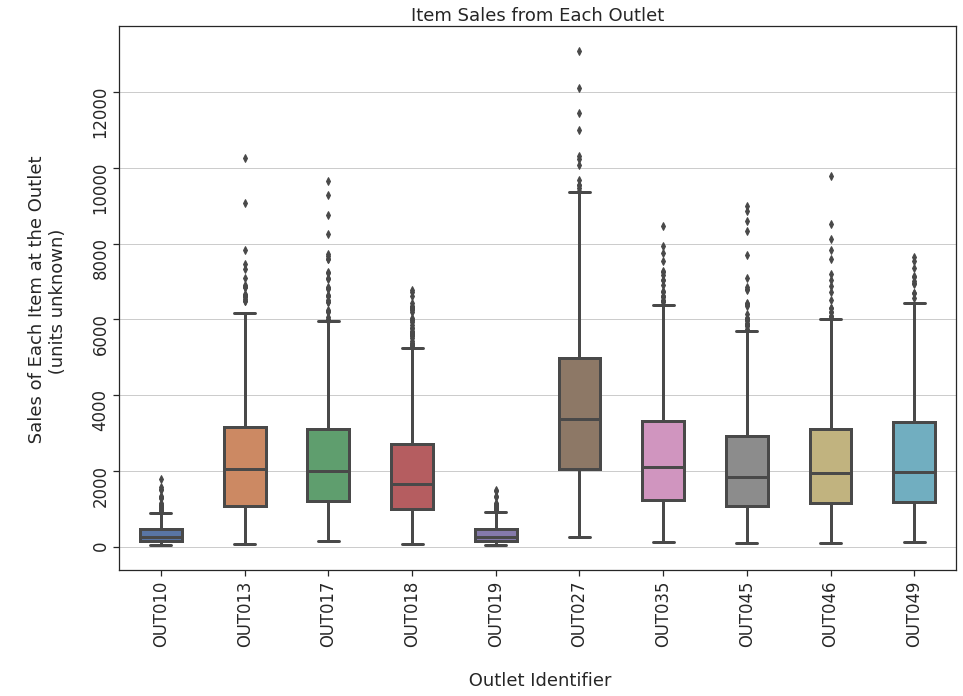

In [85]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5,style="white")
box_ax = sns.boxplot(data=df_sales.sort_values(["Outlet_Identifier"]), y="Item_Outlet_Sales",x="Outlet_Identifier",orient="v",linewidth=3,width=0.5);
box_ax.yaxis.grid(True);

box_ax.set(title="Item Sales from Each Outlet",xlabel="\n Outlet Identifier",ylabel="\n Sales of Each Item at the Outlet \n (units unknown)  \n");
box_ax.yaxis.grid(True);
box_ax.tick_params(bottom=True, left=True,rotation=90)

This shows us that most items have sales figures that are similar across most outlets. Outlets `OUT010` and `OuT019` are the exception, but remember they are also the two small grocery stores. Thi graph supports the interperation of the values I saw when I decided that `OUT010` should be small size.

A heatmap of all the data may be useful for finding other relationship correlations that are not obvious.

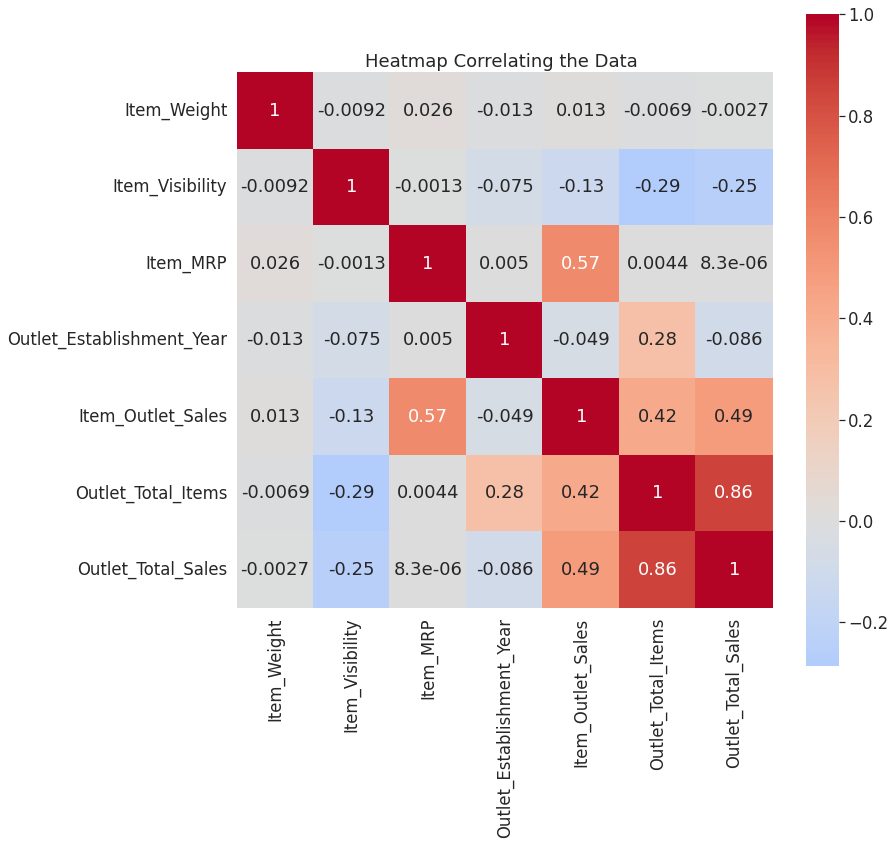

In [95]:
plt.figure(figsize=(12,12))
corr = df_sales.corr()#.drop(columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier",]).corr()
heat_ax = sns.heatmap(corr,cmap='coolwarm', annot=True,square=True,center=0)

heat_ax.set(title="Heatmap Correlating the Data ");